In [1]:
__nbid__ = '0008'
__author__ = 'Knut Olsen <knut.olsen@noirlab.edu>, Robert Nikutta <robert.nikutta@noirlab.edu>, David Herrera <david.herrera@noirlab.edu>, Astro Data Lab Team <datalab@noirlab.edu>'
__version__ = '20251205' # yyyymmdd
__datasets__ = ['des_dr1']
__keywords__ = ['dwarf galaxies', 'convolution', 'WCS', 'SIA', 'science example']

# Galaxias enanas en DES DR1
*Knut Olsen, Robert Nikutta, & Astro Data Lab Team*

#### (_Traducción de [DwarfGalaxiesInDesDr1.ipynb](https://github.com/astro-datalab/notebooks-latest/blob/master/03_ScienceExamples/DwarfGalaxies/DwarfGalaxiesInDesDr1.ipynb)_)

### Tabla de contenido
* [Objetivos y resumen](#goals)
* [Avisos legales y atribuciones](#attribution)
* [Imports y configuración](#import)
* [Autenticación](#auth)
* [Resolución de coordenadas y consulta de datos fotométricos alrededor de enanas](#photometry)
* [Filtrado y graficado de las enanas](#dwarffilter)
* [Recuperar imágenes vía servicio SIA](#sia)
* [Recursos y referencias](#resources)

<a class="anchor" id="goals"></a>
# Objetivos
* Resolver las coordenadas espaciales de los satélites enanos conocidos de la Vía Láctea
* Consultar DES DR1 para estrellas alrededor de estas posiciones
* Construir un WCS para cada consulta y graficar la distribución espacial de estrellas
* Aplicar técnicas de filtrado espacial para detectar sobredensidades estelares
* Recuperar y mostrar recortes de imagen

# Resumen
En este notebook, demostramos el descubrimiento de satélites enanos débiles de la Vía Láctea (MW) en DES DR1. Consultamos la base de datos alrededor de las posiciones de enanas conocidas y aplicamos técnicas de filtrado para revelar las enanas como sobredensidades espaciales de fuentes filtradas.

**Antecedentes**
Las galaxias enanas ultradébiles son cruciales para comprender muchos aspectos del universo. Por ejemplo, están dominadas por materia oscura; su localización en el espacio puede así trazar la estructura a gran escala de la distribución de materia oscura. Además, se sospecha que las galaxias enanas albergan agujeros negros de masa intermedia (IMBH), que hasta ahora han eludido los esfuerzos por encontrarlos. Los IMBHs puentean naturalmente la brecha entre los agujeros negros de masa solar y los agujeros negros supermasivos que residen en el centro de prácticamente todas las galaxias grandes.

**Recuperación de datos**
Recuperaremos estrellas e imágenes alrededor de la ubicación de 7 galaxias enanas encontradas en el catálogo DES DR1.

**Detección**
Convolucionaremos la distribución espacial de nuestro conjunto de datos con un par de núcleos Gaussianos y restaremos los resultados, como se hace en e.g. [Stanford et al. (2005, ApJ, 634, 2, L129)](http://adsabs.harvard.edu/abs/2005ApJ...634L.129S) (cúmulos de galaxias), o [Koposov et al. (2008, ApJ, 686, 279)](http://adsabs.harvard.edu/abs/2008ApJ...686..279K) (satélites de la MW). Esto tiene el efecto de convolucionar la distribución espacial con un filtro sombrero mexicano, útil para detectar objetos a una escala espacial deseada.

<a class="anchor" id="attribution"></a>
# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.


---- **Versión en Inglés** ----


# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.

<a class="anchor" id="import"></a>
# Importaciones y Configuración
Importar los módulos relevantes y configurar la URL para la recuperación de imágenes vía SIA.

In [11]:
# Librerías estándar
from collections import OrderedDict
from getpass import getpass

# De 3ros
import numpy as np
import pylab as plt
from astropy import utils, io, convolution, wcs
from astropy.visualization import make_lupton_rgb
from astropy.coordinates import name_resolve
from pyvo.dal import sia
%matplotlib inline

# De Data Lab
from dl import queryClient as qc, authClient as ac
from dl.helpers.utils import convert

# Configurar el servicio Acceso Simple de Imagenes (SIA)
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_dr1"
svc = sia.SIAService(DEF_ACCESS_URL)

<a class="anchor" id="auth"></a>
# Autenticación
Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Sin embargo, algunas funciones, como guardar los resultados de las consultas en el espacio de almacenamiento virtual, requieren iniciar sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, descomente la celda a continuación y ejecútela:

In [ ]:
#token = ac.login(input("Ingrese su nombre de usuario: (+ENTER) "),getpass("Ingrese su contraseña:: (+ENTER) "))
#ac.whoAmI()

<a class="anchor" id="photometry"></a>
# Resolución de coordenadas y consulta de datos de fotometría alrededor de enanas
Resolvemos las posiciones de 7 galaxias enanas y consultamos la base de datos por estrellas alrededor de ellas. Para la lista completa de columnas en la base DES DR1, visite nuestro sitio [aquí](https://datalab.noirlab.edu/query.php?name=des_dr1.main) o ejecute `print(qc.schema('des_dr1.main'))` desde una celda en este notebook.

In [3]:
# Nombres de enanas según Bechtol et al. (2015)
nombres = ['Ret II','Eri II','Tuc II','Hor I','Pic I','Phe II','Eri III']

radio = 1. # Radio de búsqueda en grados

# Columnas a consultar
columnas = '''ra,dec,mag_auto_g,mag_auto_i,mag_auto_r,mag_auto_z,flags_g,flags_i,flags_r,flags_z,
    flux_auto_g,fluxerr_auto_g,flux_auto_i,fluxerr_auto_i,spread_model_g,spread_model_i,
    spread_model_r,spread_model_z,class_star_g,class_star_i,class_star_r,class_star_z,
    kron_radius,tilename'''

Aquí hay una función para recuperar datos alrededor de un punto en el cielo y una función que obtiene las coordenadas de una fuente con nombre:

In [4]:
def obtenerDatos(ra,dec,radio=1.0,columnas='*'):

    plantilla_de_consulta =\
    """SELECT {0} FROM des_dr1.main
       WHERE q3c_radial_query(ra,dec,{1},{2},{3})"""

    query = plantilla_de_consulta.format(columnas,ra,dec,radio)
    
    try:
        result = qc.query(sql=query) # Por omisión, el resultado es una cadena en formato CSV
    except Exception as e:
        print(e.message)
        
    df = convert(result) # Convertir a objeto Pandas dataframe
    
    return df

def resolve_coordinates(name):
    try:
        coords = name_resolve.get_icrs_coordinates(name)
    except Exception as e:
        raise

    ra = coords.ra.to('deg').value
    dec = coords.dec.to('deg').value      

    return coords, ra, dec

Aquí haremos un bucle sobre cada una de las 7 enanas, resolviendo sus coordenadas y consultando los datos de fotometría:

In [5]:
dgs = OrderedDict([(name,dict()) for name in nombres]) # Diccionario vacío de diccionarios

for j,name in enumerate(dgs.keys()):
    print('{:s}: Resolviendo coordenadas y consultando datos'.format(name))
    coords, ra0, dec0 = resolve_coordinates(name)
    dgs[name]['ra0'] = ra0
    dgs[name]['dec0'] = dec0
    df = obtenerDatos(ra0,dec0,radio=radio,columnas=columnas)
    dgs[name]['df'] = df
print("Listo.")

Ret II: Resolviendo coordenadas y consultando datos
Eri II: Resolviendo coordenadas y consultando datos
Tuc II: Resolviendo coordenadas y consultando datos
Hor I: Resolviendo coordenadas y consultando datos
Pic I: Resolviendo coordenadas y consultando datos
Phe II: Resolviendo coordenadas y consultando datos
Eri III: Resolviendo coordenadas y consultando datos
Listo.


<a class="anchor" id="dwarffilter"></a>
# Filtrado y graficado de las enanas
Filtramos la fotometría para incluir objetos sin banderas SE, con S/N>10, que sean puntuales (usando `SPREAD_MODEL`, `CLASS_STAR` y `KRON_RADIUS`--ver el notebook [StarGalQsoDESDR1](https://github.com/astro-datalab/notebooks-latest/blob/master/03_ScienceExamples/StarGalQSOSeparation/StarGalQsoDESDR1.ipynb) para detalles), y que sean relativamente azules (*g-i* < 1.0). Convolucionamos el resultado con el filtro espacial (definido abajo).

Algunas funciones auxiliares primero:

In [6]:
# Crear un objeto WCS apropiado
def get_wcs(ra,dec,image,fov=1.,unit='deg',projection=("RA---TAN","DEC--TAN")):
    npix = image.shape[0]
    crpix = npix/2 + 1
    cdelt = fov/float(npix)
    w = wcs.WCS(naxis=2)
    w.wcs.cunit = (unit,unit)
    w.wcs.crpix = (crpix,crpix)
    w.wcs.cdelt = np.array((-cdelt,cdelt))
    w.wcs.ctype = projection
    w.wcs.crval = (ra,dec)
    return w

# Un filtro de convolución espacial
def filtro_de_enanas (ra,dec,fwhm_small=2.0,fwhm_big=20):

    """Convolución diferencial con núcleos gaussianos 2D.
    
       Basado en Koposov et al. (2008).
       Código por Ken Mighell y Mike Fitzpatrick.
       Pequeñas modificaciones por RN.
       
       Parámetros
       ----------
       ra, dec : float o array
           RA & Dec en grados.
    
       fwhm_small, fwhm_big : float
           Tamaños de ancho completo a la mitad (FWHM) de los núcleos gaussianos pequeño y grande
           para usar en la convolución, en minutos de arco.
    """
    
    x, y = ra, dec

    print("Calculando convolución diferencial")

    # Información sobre la declinación (y) [grados]
    ymean = (y.min() + y.max()) / 2.0
    ydiff_arcmin = (y.max() - y.min()) * 60.0 # convertir de grados a minutos de arco

    # Información sobre la ascensión recta (x) [grados en tiempo]:
    xdiff = x.max() - x.min() # separación angular [grados (tiempo)] 
    xmean = (x.min() + x.max()) / 2.0

    # Convertir de grados en tiempo a separación en grados angulares:
    xdiff_angular = (x.max() - x.min()) * np.cos(ymean*(np.pi/180.0))

    # Convertir de grados a minutos de arco
    xdiff_angular_arcmin = xdiff_angular * 60.0 

    # Obtener el número de pixeles de un minuto de arco en las direcciones x y y:
    nx = np.rint(xdiff_angular_arcmin).astype('int')
    ny = np.rint(ydiff_arcmin).astype('int')

    # Crear un histograma 2D de los conteos brutos:
    Counts, xedges, yedges  = np.histogram2d (x, y, (nx,ny) )
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    raw_hist = np.rot90(Counts).copy() # hack alrededor de la rareza pythonica

    # Crear los núcleos gaussianos pequeño y grande con desviación estándar
    # del FWHM dado en pixeles de minutos de arco^2:
    kernel_small = convolution.Gaussian2DKernel(fwhm_small/2.35,factor=1)
    kernel_big = convolution.Gaussian2DKernel(fwhm_big/2.35,factor=1)

    # Calcular los núcleos de convolución diferencial:
    conv_big = convolution.convolve(raw_hist, kernel_big)
    conv_small = convolution.convolve(raw_hist, kernel_small)
    conv_delta = conv_small - conv_big
    delta = conv_delta.copy()

    # Calcular estadísticas y el piso:
    mean = np.mean(delta, dtype='float64')
    sigma = np.std(delta, dtype='float64')
    sigmaRaw = np.std(raw_hist,dtype='float64')
    floor = mean

    clipped = delta.copy()
    clipped[delta < floor] = floor

    # Devolver los campos calculados:
    return raw_hist, extent, delta, clipped, sigma

Ahora ejecutemos el filtro de enanas en cada campo recuperado y grafiquemos las distribuciones espaciales convolucionadas resultantes:

    Ret II: Calculando convolución diferencial
    Eri II: Calculando convolución diferencial
    Tuc II: Calculando convolución diferencial
     Hor I: Calculando convolución diferencial
     Pic I: Calculando convolución diferencial
    Phe II: Calculando convolución diferencial
   Eri III: Calculando convolución diferencial
Listo.


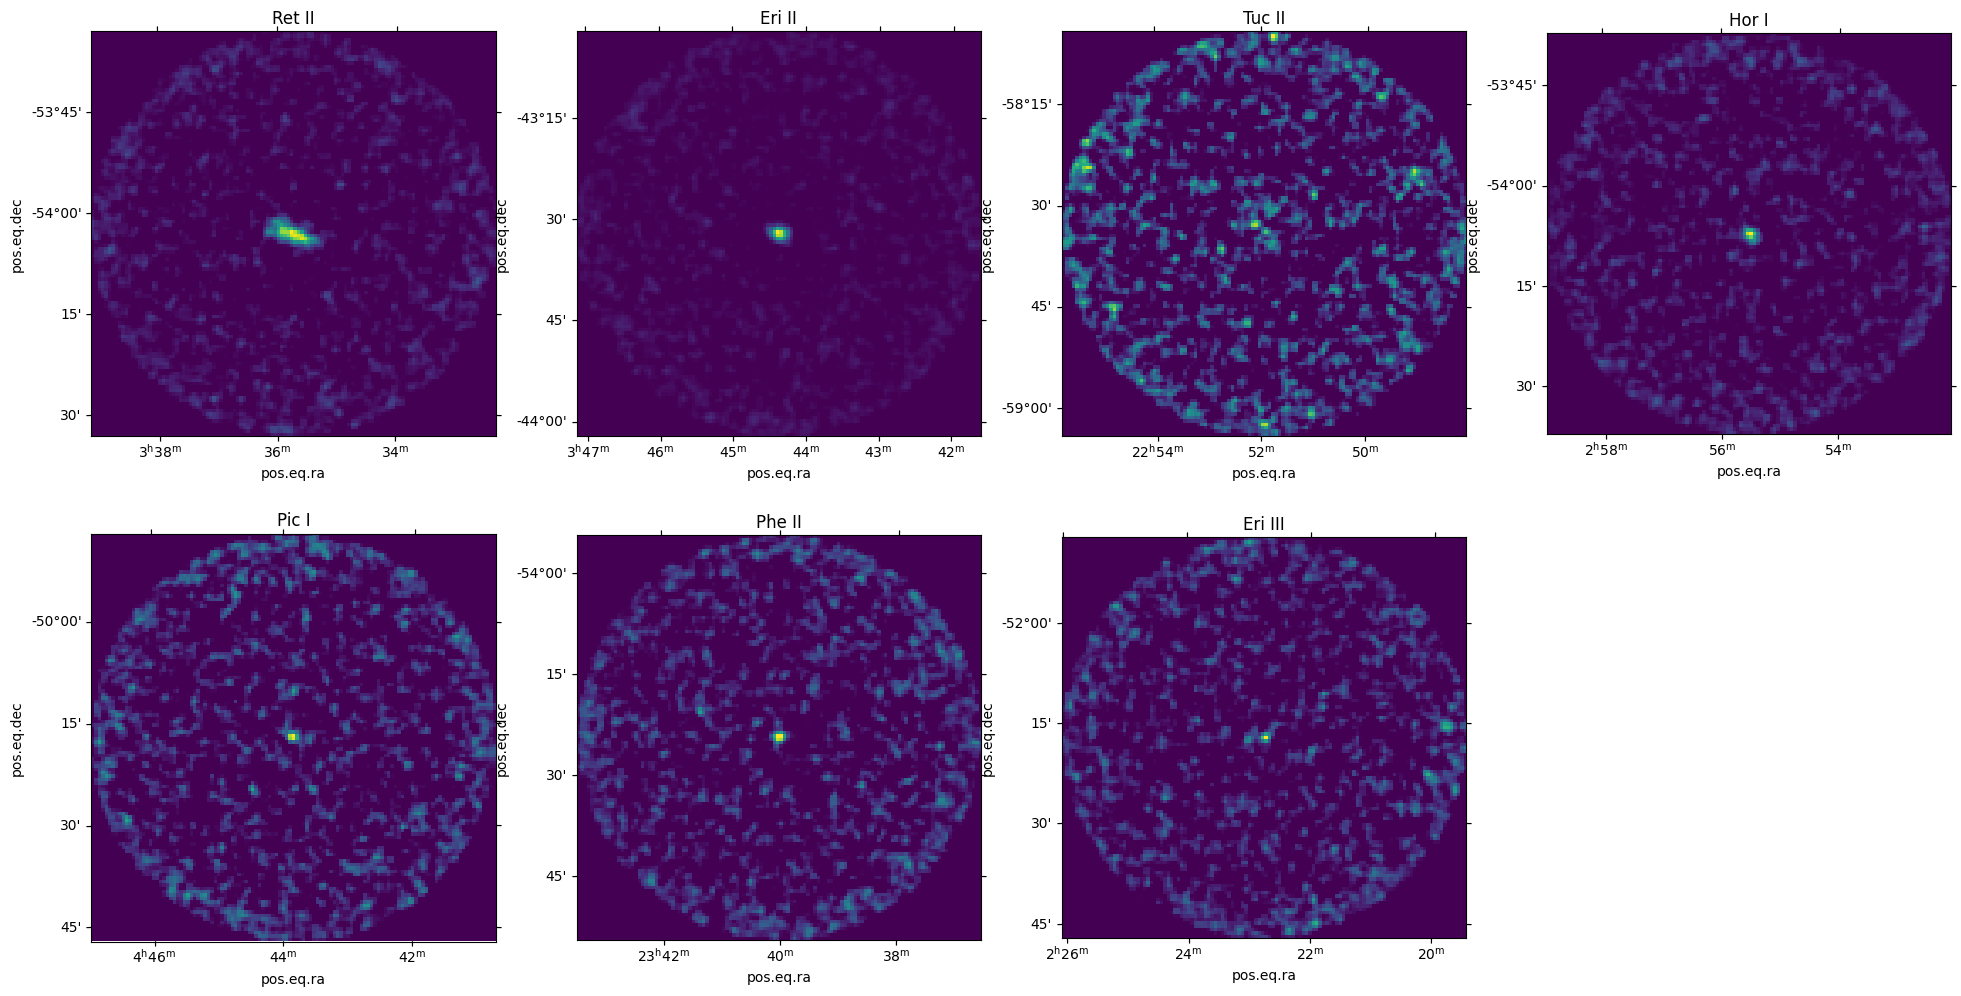

In [7]:
nrow, ncol = 2, 4  # Diseño de la figura

# Restricciones comunes
maginvalid = 90
spread = 0.01

# Configurar figura
fig = plt.figure(figsize=(6*ncol,6*nrow))

# Bucle sobre las enanas
for j,name in enumerate(dgs.keys()):
    print("{:>10s}: ".format(name),end='')
    dwarf = dgs[name]
    df = dwarf['df']  # el objeto Pandas dataframe de la enana actual
    
    # Definir criterios de restricción
    # (magnitudes válidas, sin flags, SNR>10, rango de color, probabilidad de estrella alta, estrellas más débiles que gmag=18)
    keep = (df['mag_auto_g']<maginvalid) & (df['mag_auto_i']<maginvalid) &\
           (df['flags_g']==0) & (df['flags_i']==0) &\
           ((df['flux_auto_g']/df['fluxerr_auto_g'])>10) &\
           ((df['mag_auto_g']-df['mag_auto_r'])>-0.5) & ((df['mag_auto_g']-df['mag_auto_r'])<1.0) &\
           (np.abs(df['spread_model_g'])<spread) & (np.abs(df['spread_model_i'])<spread) &\
           (df['class_star_g']>0.1) & (df['kron_radius']<6) &\
           (df['mag_auto_g']>18)
           
    # Aplicar restricciones y ejecutar el filtro de enanas
    raw_hist, extent, delta, clipped, sigma = filtro_de_enanas(df['ra'][keep],df['dec'][keep])
    
    # Construir un WCS
    w = get_wcs(dwarf['ra0'],dwarf['dec0'],clipped,fov=1.)
    
    # Graficar el histograma 2D recortado
    ax = fig.add_subplot(nrow,ncol,j+1,projection=w)
    im = plt.imshow(clipped)
    ax.set_title(name)
    
print("Listo.")

<a class="anchor" id="sia"></a>
# Recuperar imágenes (servicio SIA)
Demostramos cómo recuperar imágenes a través del servicio SIA (Acceso Simple de Imagenes, por sus siglas en inglés) para una de las enanas. Primero, definimos dos funciones auxiliares útiles: una para descargar la imagen apilada más profunda disponible en un determinado filtro, y otra para graficar imágenes fácilmente.

In [8]:
# Descargar las imágenes apiladas más profundas
def descargar_imagen_mas_profunda(ra,dec,fov=0.1,bands=list('gri')):
    imgTable = svc.search((ra,dec), (fov/np.cos(dec*np.pi/180), fov), verbosity=2).to_table()
    print("La lista completa de imágenes contiene {:d} entradas.".format(len(imgTable)))
    sel0 = (imgTable['proctype'] == 'Stack') & (imgTable['prodtype'] == 'image') # selección básica
    images = []
    for band in bands:
        print("Filtro {:s}: ".format(band), end='')
        sel = sel0 & (imgTable['obs_bandpass'] == band) # Agregar 'banda' a la selección
        Table = imgTable[sel]
        row = Table[np.argmax(Table['exptime'].data.data.astype('float'))] # Escoger imagen con mayor tiempo de exposición
        url = row['access_url'] # Obtener URL de descarga
        print('descargando imagen apilada más profunda...')
        img = io.fits.getdata(utils.data.download_file(url,cache=True,show_progress=False,timeout=120)) # .decode() porque en Python 3 url es tipo "byte" y getdata() espera tipo "string"
        images.append(img)
        
    print("Descargadas {:d} imágenes.".format(len(images)))
    return images

# Graficador de imágenes multi panel
def graficar_imagenes(images,geo=None,panelsize=5,titles=list('gri'),cmap=plt.cm.gray_r):
    if geo is None:
        geo = (len(images),1)  # ncols, nrows
        
    fig = plt.figure(figsize=(geo[0]*panelsize,geo[1]*panelsize))
    for j,img in enumerate(images):
        ax = fig.add_subplot(geo[1],geo[0],j+1)
        ax.imshow(img,origin='lower',interpolation='none',cmap=cmap,norm=plt.mpl.colors.PowerNorm(0.1))
        ax.set_title('{:s}'.format(titles[j]))
        plt.axis('off')
    
    fig.subplots_adjust(wspace=0.05)

Vamos a descargar la imagen más profunda disponible por filtro

In [9]:
name = 'Ret II'
fov = 0.25 # degrees
bands = list('gri')
images = descargar_imagen_mas_profunda(dgs[name]['ra0'],dgs[name]['dec0'],fov=0.25,bands=bands)

La lista completa de imágenes contiene 18 entradas.
Filtro g: descargando imagen apilada más profunda...
Filtro r: descargando imagen apilada más profunda...
Filtro i: descargando imagen apilada más profunda...
Descargadas 3 imágenes.


También calculamos una imagen en falso color de 3 bandas y graficamos todas las imágenes

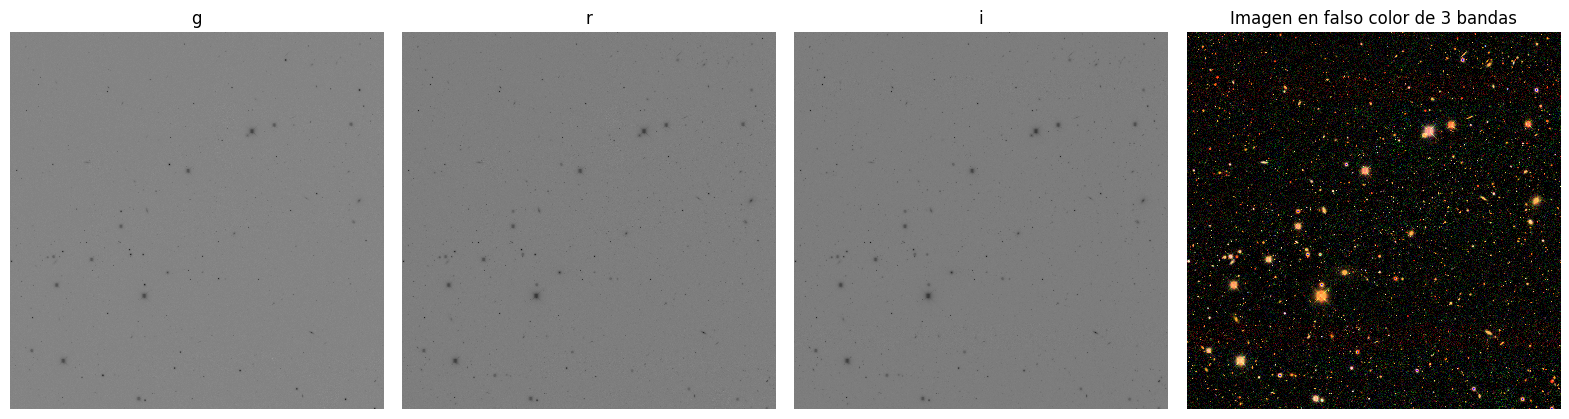

In [10]:
%%capture --no-display
images_ = [im-np.median(im) for im in images]
images_ += [make_lupton_rgb(*images[::-1],Q=3,stretch=30)] # La función espera las imágenes en orden rojo, verde, azul
graficar_imagenes(images_,geo=(4,1),titles=bands+['Imagen en falso color de 3 bandas'])

<a class="anchor" id="resources"></a>
## Recursos y referencias

Bechtol, K., et al. (2015, ApJ, 807, 50) "Eight New Milky Way Companions Discovered in First-year Dark Energy Survey Data":
http://adsabs.harvard.edu/abs/2015ApJ...807...50B

Koposov et al. (2008, ApJ, 686, 279) "The Luminosity Function of the Milky Way Satellites": http://adsabs.harvard.edu/abs/2008ApJ...686..279K
